## 01 Pagerank

**Pagerank** es el algoritmo que hizo a **Google** sobresalir de la competencia de los motores de buúsqueda por asignar un ranking a las páginas web

En 1998 S. Brin, L. Page, R. Motwani y T. Winograd publicaron el algoritmo Page Rank en el artículo [The Page Rank Citation Ranking: Bringing Order to the Web](http://ilpubs.stanford.edu:8090/422/)

Pagerank asigna un puntaje (ranking) a cada nodo de un grafo. En términos de la world wide web un nodo es una página y la arista son los outlinks a las páginas que apunta. En palabras coloquiales, el puntaje de un nodo puede ser interpretado como un promedio ponderado de los puntajes de las nodos que apuntan a él. 

Así, la importancia de un nodo se juzga por los *votos* de otros nodos importantes que apuntan a éste. El peso (ponderación) se distribuye dependiendo de cuantas relaciones hacia afuera tiene un nodo, es decir, la importancia de un nodo se diluye entre el número de ligas hacia otros nodos.

Ejemplo. Pensar que sucede en redes sociales.

Hablando de páginas web, cuando hacemos una busqueda, primero se filtran las páginas que tienen el contenido de nuestra busqueda, y después los resultados se ordenan según el Pagerank de estas páginas filtradas

Pagerank es un sistema más difícil de ser engañado (sesgado) por spammers.

**Principio básico de Pagerank**

1. En una red con $N$ nodos, se asigna el mismo valor inicial de Pagerank igual a $1/n$.
2. Se elije un número de pasos $k$.
3. En cada secuencia de pasos se actualiza el valor de Pagerank. Cada nodo divide su valor actual de Pagerank equitativamente para cada outlink. cada nodo actualiza su valor a un nuevo Pagerank como la suma de los valores que recive.

Alternativamente, se puede representar el grafo con una matriz con entradas

\begin{split}Q_{ij} = \begin{cases}
\frac{1}{N_j} & \text{ si existe un link de } j \text{ a } i \\
0 & \text{ en otro caso}
\end{cases}
\end{split}

El pagerank de una página i es una suma ponderada de aquellas páginas que hacen referencia a i. La ponderación se realiza por el número de outlinks que tienen tales páginas, esto es:

$r_i = \displaystyle \sum_{j \in I_i} \frac{r_j}{N_j}$

donde: $r_i$ es el pagerank de la página i y $N_i$ es el el número de outlinks de la página i.

**Ejemplo**

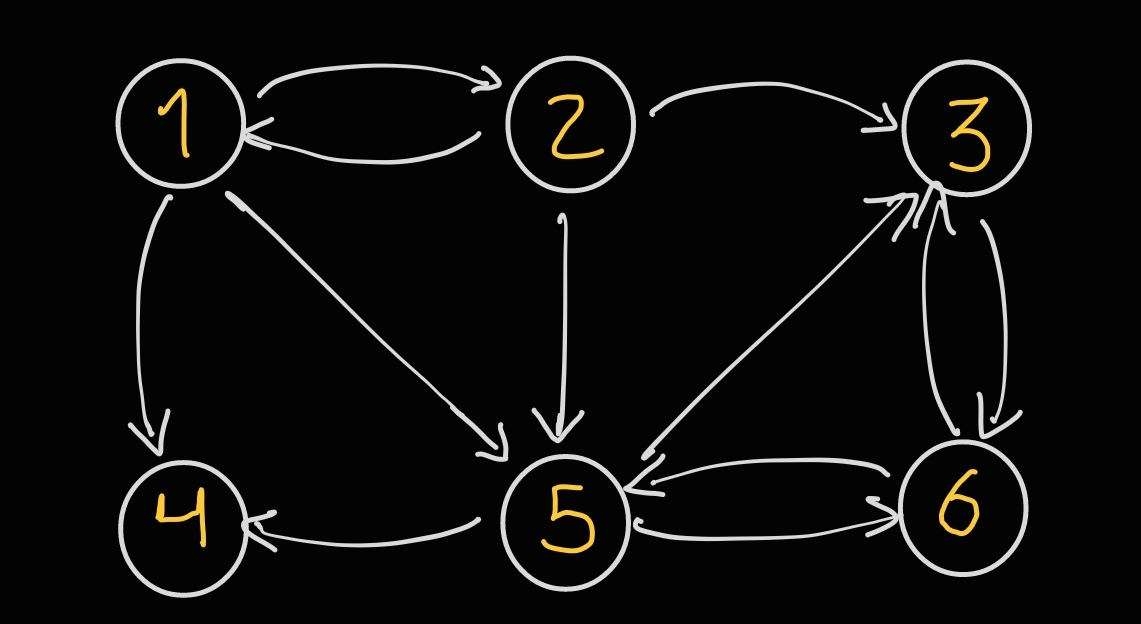

la matriz asociada a este grafo es

\begin{split}Q = \left [\begin{array}{cccccc}
0 & \frac{1}{3} & 0 & 0 & 0 & 0\\
\frac{1}{3} & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{3} & 0 & 0 & \frac{1}{3} & \frac{1}{2} \\
\frac{1}{3} & 0 & 0 & 0 & \frac{1}{3} & 0 \\
\frac{1}{3} & \frac{1}{3} & 0 & 0 & 0 & \frac{1}{2} \\
0 & 0 & 1& 0 & \frac{1}{3} & 0
\end{array}
\right ]
\end{split}

Observar que las sumas por columnas suman 1

**El modelo random surfer**

En el método de pagerank se asume un modelo de **caminata aleatoria** (random walk) en el grafo de la web, en el que un random surfer da clicks de forma sucesiva y aleatoria con igual probabilidad entre las páginas de los outlinks de cada página. Tal modelo induce una **Cadena de Markov**. El eigenvector r corresponde a la distribución de probabilidad estacionaria de la cadena. Los estados de la cadena son las páginas y las transiciones son los links entre las páginas.

> Una cadena de Markov es un proceso aleatorio en el que se describen posibles estados (eventos) que ocurren en puntos del tiempo y cada estado se encuentra completamente determinado (depende) del estado presente. A tales cadenas se les asocian matrices de transición cuyas entradas representan probabilidades de pasar de un estado a otro. En el ejemplo $Q^T$ es matriz de transición.

**Posibles dificultades**

- Callejones sin salida (dead end)
- Trampas de telaraña (spider traps)
- Red disconexa

Ejemplo de callejón sin salida (dead end)

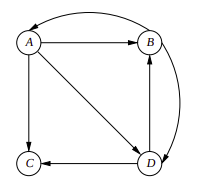

Ejemplo de trampa de telaraña

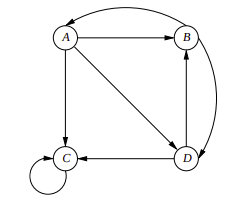

solución a las dificultades anteriores

Adición de un factor para obtener **matrices estocásticas** por columnas

El cálculo del pagerank de i se modifica asumiendo que siempre existe al menos un outlink de la página i 

La modificación de forma matematica queda:

$$P = Q + \frac{1}{n}ed^T$$

donde $e = (1, \dots, 1)^T$ y $d$ es un vector con entradas $d_j = \begin{cases} 1 & \text{ si } N_j = 0 \\ 0 & \text{ en otro caso } \end{cases}$

La matriz P anterior es una matriz estocástica por columna: tiene elementos no negativos y la suma de cada columna es 1. La matriz de transición de la cadena de Markov es $P^T$.

**Ejemplo**. 

In [1]:
# Importamos librerías
import numpy as np

In [2]:
# definimos la matriz Q
Q = np.array([[0, 1/3, 0, 0, 0, 0],
     [1/3, 0, 0, 0, 0, 0],
     [0, 1/3, 0, 0, 1/3, 1/2],
     [1/3, 0, 0, 0, 1/3, 0],
     [1/3, 1/3, 0, 0, 0, 1/2],
     [0, 0, 1, 0, 1/3, 0]])

print(Q) 

[[0.         0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.33333333 0.5       ]
 [0.33333333 0.         0.         0.         0.33333333 0.        ]
 [0.33333333 0.33333333 0.         0.         0.         0.5       ]
 [0.         0.         1.         0.         0.33333333 0.        ]]


In [3]:
_,n = Q.shape
e = np.ones(n)
d = np.array([0, 0, 0, 1, 0, 0])

In [4]:
print(1/n*np.outer(e,d))

[[0.         0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.16666667 0.         0.        ]]


In [5]:
# Definimos la matriz P
P = Q + 1/n*np.outer(e,d) 
print(P)

[[0.         0.33333333 0.         0.16666667 0.         0.        ]
 [0.33333333 0.         0.         0.16666667 0.         0.        ]
 [0.         0.33333333 0.         0.16666667 0.33333333 0.5       ]
 [0.33333333 0.         0.         0.16666667 0.33333333 0.        ]
 [0.33333333 0.33333333 0.         0.16666667 0.         0.5       ]
 [0.         0.         1.         0.16666667 0.33333333 0.        ]]


Para garantizar la solución se modifica la matriz P haciendola irreducible. 

> Una matriz irreducible como aquella para la que su grafo asociado siempre existe un camino que une dos nodos distintos. Esto se nombra **grafo fuertemente conectado**.

$$A = \alpha P + (1-\alpha) \frac{1}{n}ee^T$$

Usualmente $\alpha = 0.85$

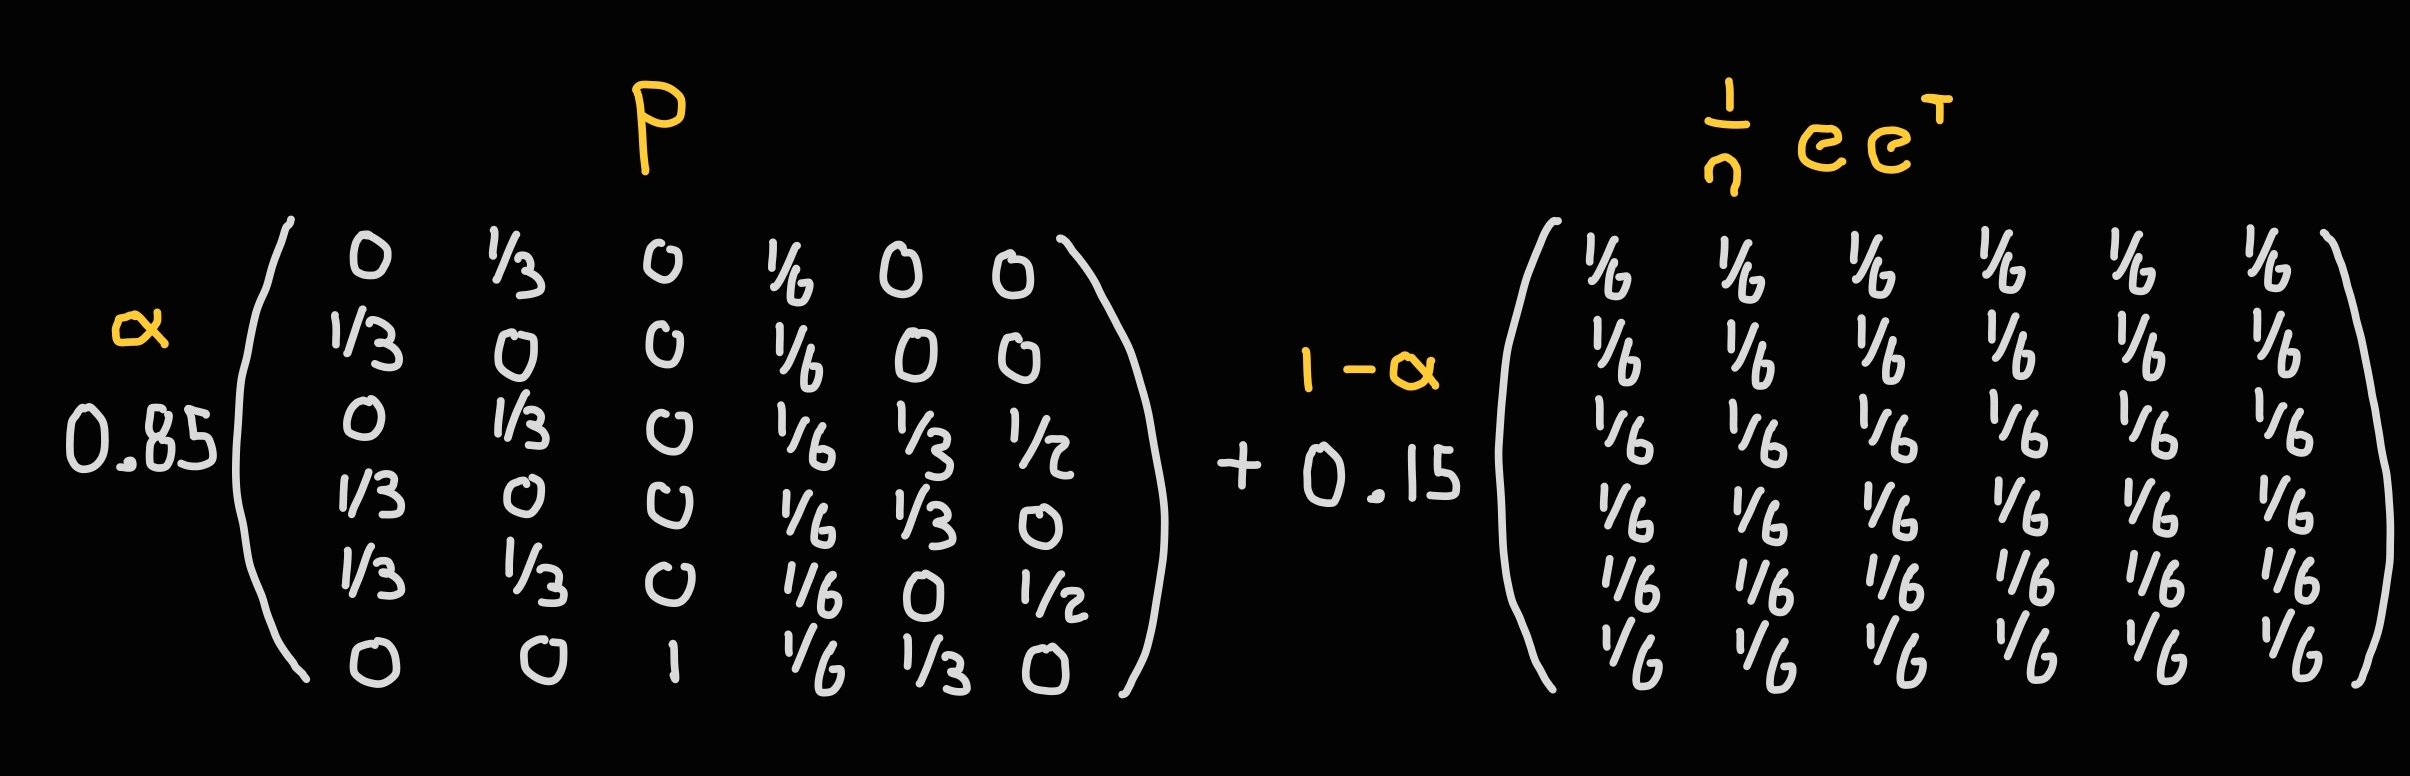

Continuando el ejemplo

In [6]:
_,n = P.shape
alpha = 0.85
A = alpha*P + (1-alpha)*1/n*np.outer(e,e)

In [7]:
print(A)

[[0.025      0.30833333 0.025      0.16666667 0.025      0.025     ]
 [0.30833333 0.025      0.025      0.16666667 0.025      0.025     ]
 [0.025      0.30833333 0.025      0.16666667 0.30833333 0.45      ]
 [0.30833333 0.025      0.025      0.16666667 0.30833333 0.025     ]
 [0.30833333 0.30833333 0.025      0.16666667 0.025      0.45      ]
 [0.025      0.025      0.875      0.16666667 0.30833333 0.025     ]]


Desde el punto de vista de una caminata aleatoria, calculamos la distribución estacionaria de A para encontrar el pagerank de cada nodo.

In [8]:
An = np.linalg.matrix_power(A, 50) 

In [9]:
print(An)

[[0.05791672 0.05791672 0.05791672 0.05791672 0.05791672 0.05791672]
 [0.05791672 0.05791672 0.05791672 0.05791672 0.05791672 0.05791672]
 [0.24902806 0.24902806 0.24902806 0.24902806 0.24902806 0.24902806]
 [0.11651987 0.11651987 0.11651987 0.11651987 0.11651987 0.11651987]
 [0.20683465 0.20683465 0.20683465 0.20683465 0.20683465 0.20683465]
 [0.31178398 0.31178398 0.31178398 0.31178398 0.31178398 0.31178398]]


Resolver mismo ejemplo utilizando una librería especializada para grafos

In [10]:
# Importar Librerías

import pandas as pd
import numpy as np
import networkx as nx


In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Crear un grafo definiendo las uniones entre nodos

In [12]:
# Inicializar un grafo vacio
G = nx.DiGraph()

G.add_edges_from([('N1', 'N2'), ('N1', 'N4'), ('N1', 'N5'), 
                  ('N2', 'N1'), ('N2', 'N3'), ('N2', 'N5'), 
                  ('N3', 'N6'), ('N5', 'N4'), ('N5', 'N6'), 
                  ('N5', 'N3'), ('N6', 'N3'), ('N6', 'N5')]) 


In [13]:
print(G.nodes())
print(G.edges())

['N1', 'N2', 'N4', 'N5', 'N3', 'N6']
[('N1', 'N2'), ('N1', 'N4'), ('N1', 'N5'), ('N2', 'N1'), ('N2', 'N3'), ('N2', 'N5'), ('N5', 'N4'), ('N5', 'N6'), ('N5', 'N3'), ('N3', 'N6'), ('N6', 'N3'), ('N6', 'N5')]


Obtener el número de nodos y relaciones

In [14]:
print(G.number_of_nodes())
print(G.number_of_edges())

6
12


Visualizar el grafo

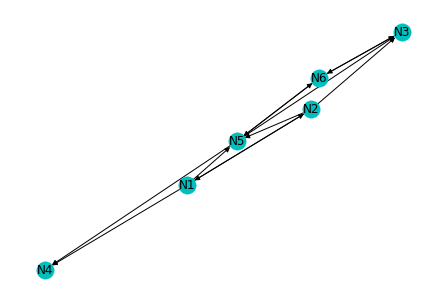

In [38]:
nx.draw(G,node_color='c',edge_color='k', with_labels=True)

In [16]:
#help(nx.pagerank)

Help on function pagerank in module networkx.algorithms.link_analysis.pagerank_alg:

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
    Returns the PageRank of the nodes in the graph.
    
    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.
    
    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.
    
    alpha : float, optional
      Damping parameter for PageRank, default=0.85.
    
    personalization: dict, optional
      The "personalization vector" consisting of a dictionary with a
      key some subset of graph nodes and personalization value each of those.
      At least one personalization value must be non-zero.
      If not specfiied, a nodes personalization 

Aplicar la función pagerank nos regresa un diccionario con el nodo y su puntaje asociado

In [17]:
nx.pagerank(G)

{'N1': 0.05791689159443311,
 'N2': 0.05791689159443311,
 'N4': 0.1165197958636798,
 'N5': 0.20683506585049483,
 'N3': 0.24902815477951876,
 'N6': 0.3117832003174402}

Ejemplos de calculos adicionales (entre otros) que se pueden obtener con la librería networkx

---

Otras metricas que se pueden obtener con la librería networkx en las que no profundizaremos de momento.

**Connectivity**

Mide como están distribuidas las relaciones entre nodos. Es un conteo del mínimo número de nodos que deben ser removidos antes de que el grafo se vuelva disconexo.

In [18]:
nx.node_connectivity(G)

0

**Densidad**

El número de relaciones entre el número de relaciones posibles

In [19]:
nx.density(G)

0.4

**Shortest Path**

El camino más corto entre 2 nodos

In [20]:
nx.shortest_path(G, "N1","N6")

['N1', 'N5', 'N6']

---

Crear un grafo a partir de un archivo con formato xlsx (similar para csv).

In [21]:
# Librerías

import numpy as np
import pandas as pd

In [22]:
# Leer datos
estaciones_metro_cdmx = pd.read_excel("/home/leonardo/Documentos/Acatlan/datos_masivos_II_2020/datos/estaciones_metro_cdmx.xlsx")

In [23]:
# Encabezado
estaciones_metro_cdmx.head()

,Source,Target,Type,weight
0,Tacubaya,Observatorio,Undirected,1
1,Juanacatlán,Tacubaya,Undirected,1
2,Chapultepec,Juanacatlán,Undirected,1
3,Sevilla,Chapultepec,Undirected,1
4,Insurgentes,Sevilla,Undirected,1


In [24]:
# Dimensiones de la tabla
estaciones_metro_cdmx.shape

(183, 4)

Si tienen problemas para leer el archivo en formato csv o xls, intenten con el formato feather, que fue diseñado para una mejor lectura de datos entre Python y R. Para mayor referencia consultar el link: [feather format](https://blog.rstudio.com/2016/03/29/feather/)

In [25]:
# !pip install feather-format
# estaciones_metro_cdmx = feather.read_dataframe("ruta")

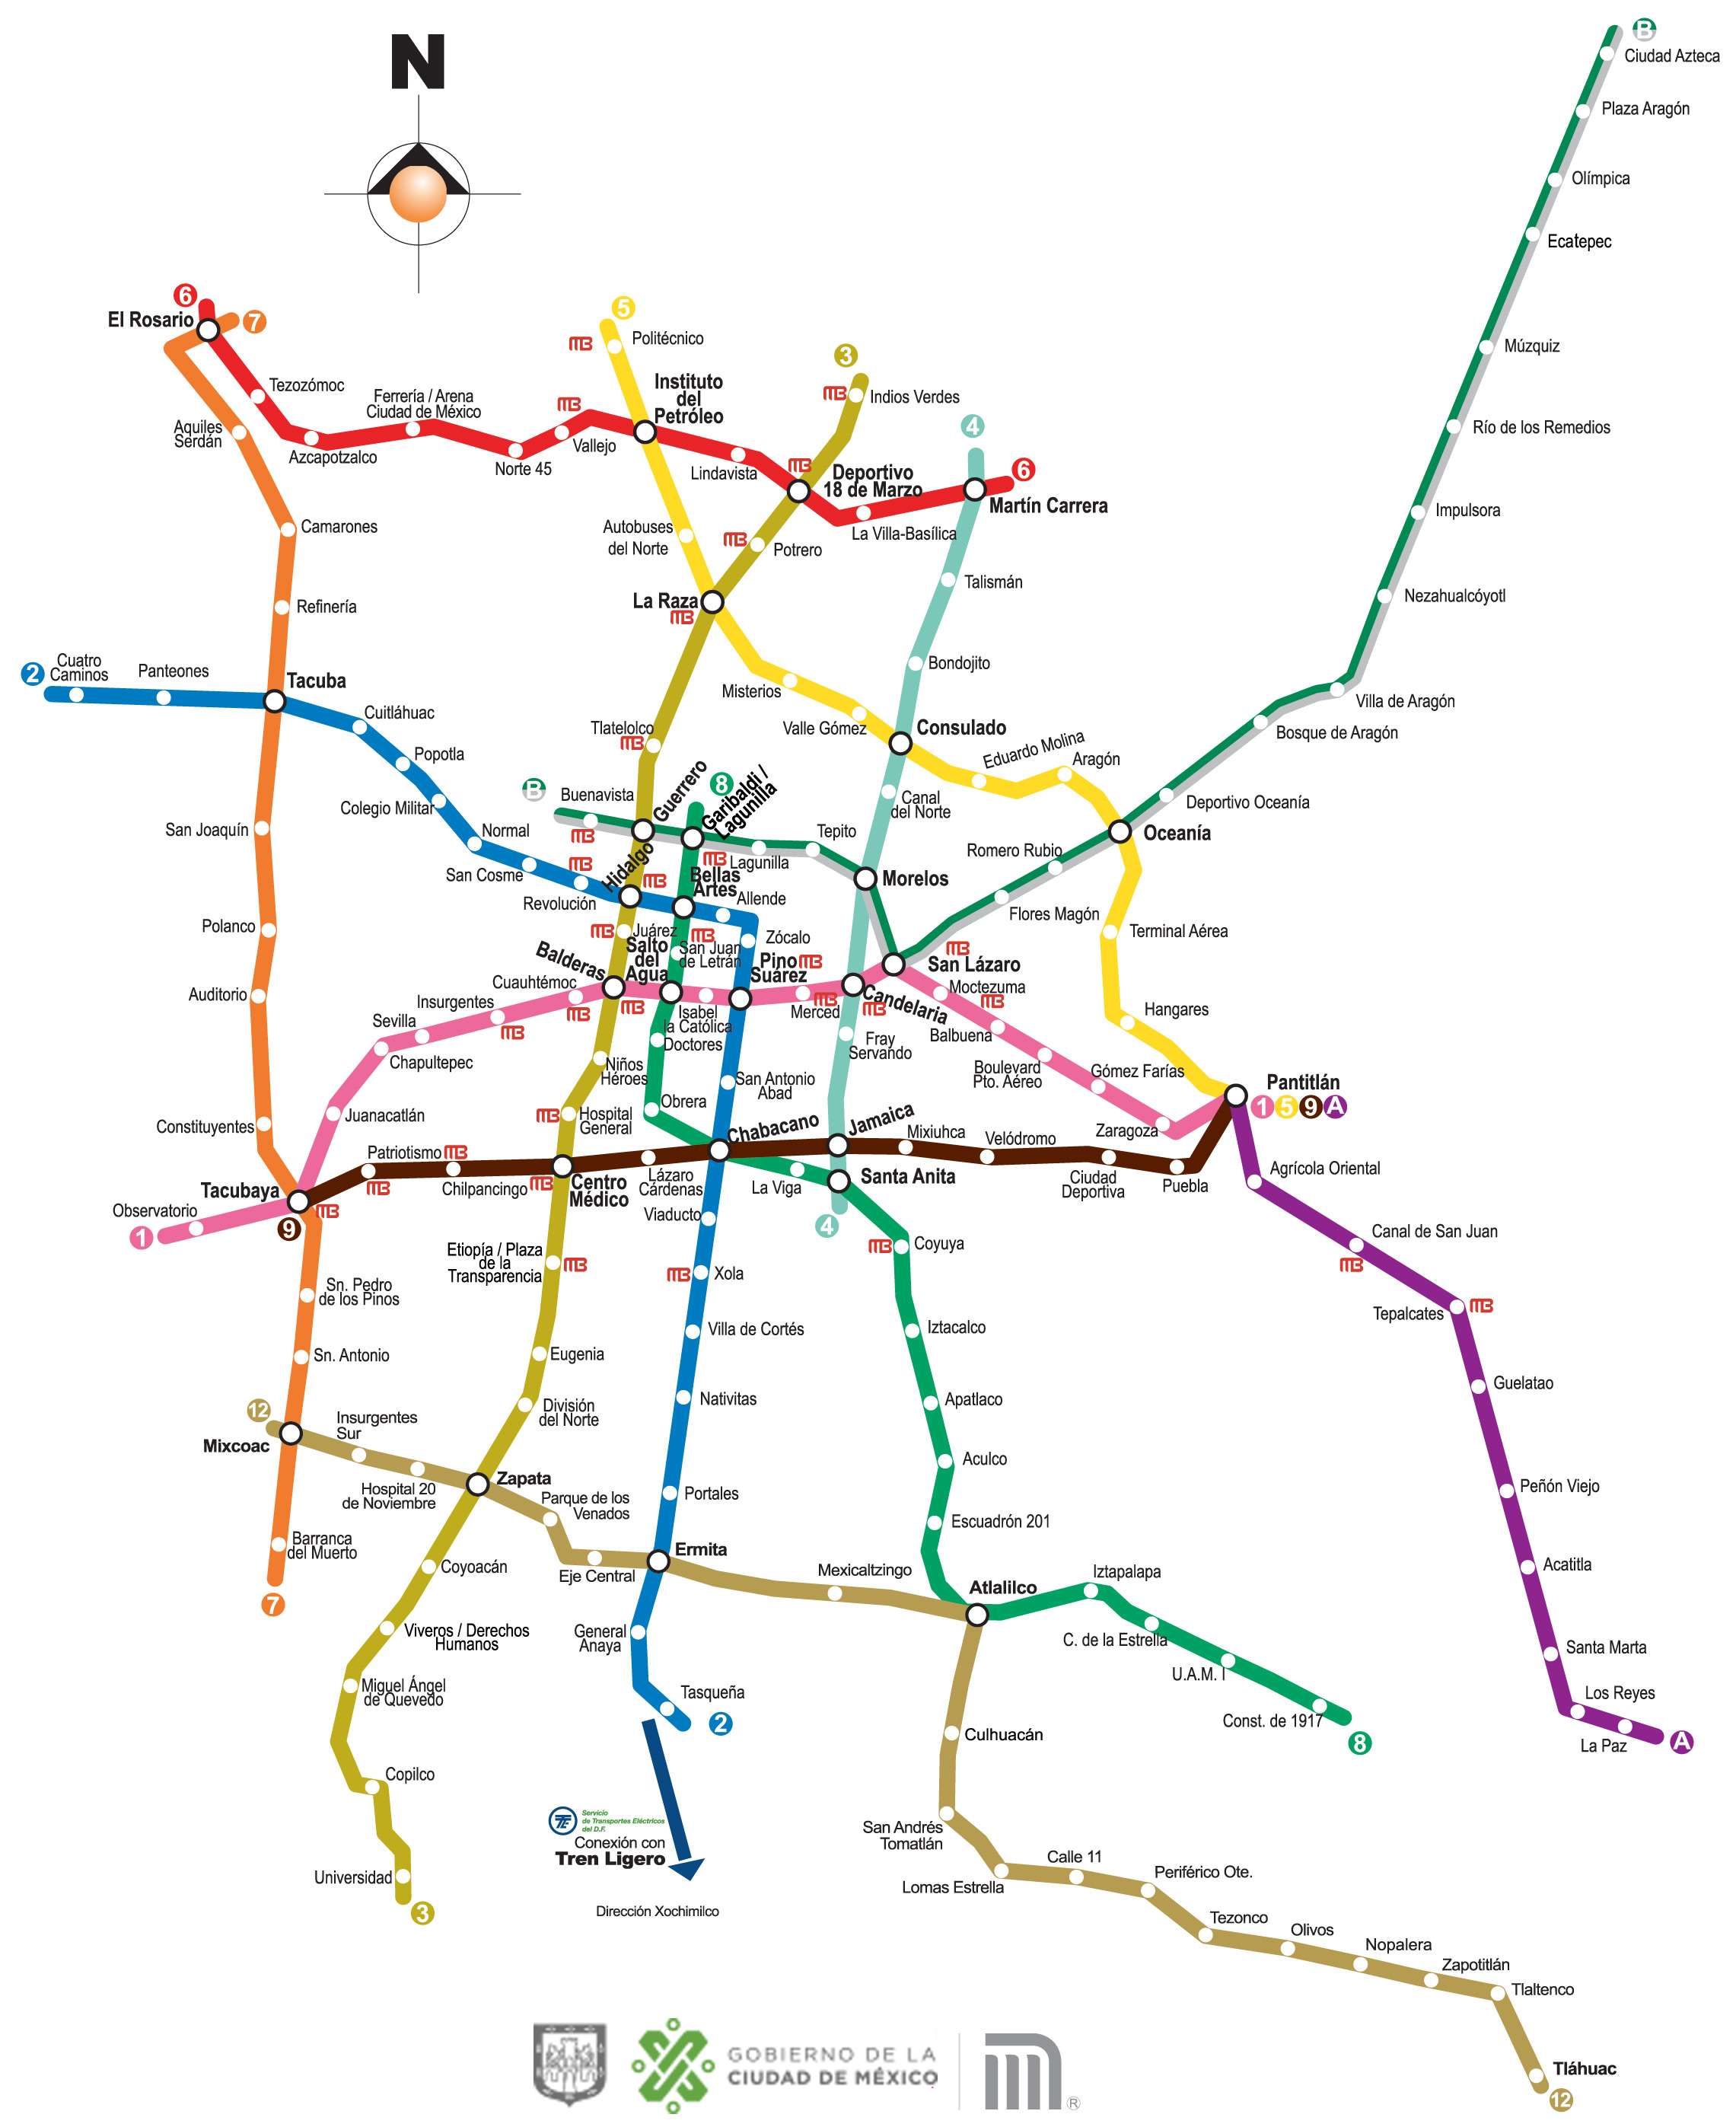

In [26]:
# Crear grafo vacio
G_metro_cdmx = nx.Graph()

In [27]:
# Iterar sobre los registros para crear las relaciones

for _, edge in estaciones_metro_cdmx.iterrows():
    G_metro_cdmx.add_edge(edge['Source'], edge['Target'])

Número de nodos y relaciones

In [28]:
print(G_metro_cdmx.number_of_nodes())
print(G_metro_cdmx.number_of_edges())

163
183


In [29]:
# La visualización para esta cantidad de nodos no se aprecia muy bien usando la función nx.draw
# nx.draw(G_metro_cdmx,node_color='c',edge_color='k',with_labels=True))

Visualizar el grafo usando software especializado que permite tener control completo del grafico final. [D3](https://d3js.org/). No es necesario que ustedes seean especialista en todo, alguien de su equipo puede encargarse de ello.

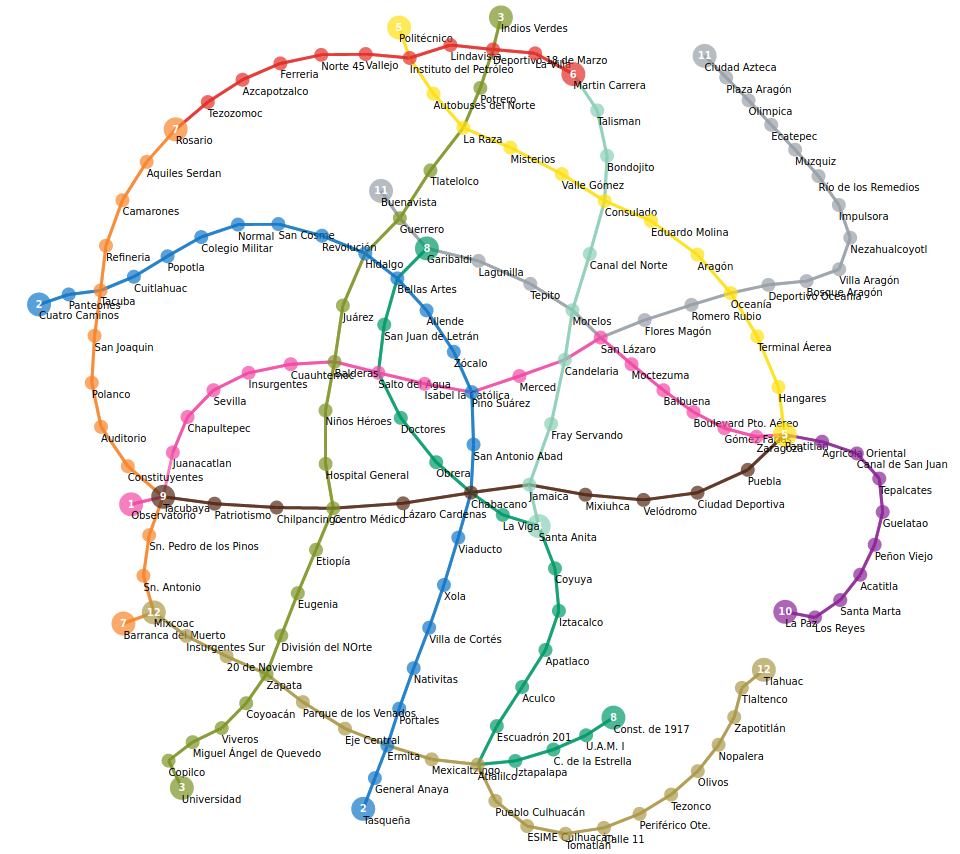

Calcular Pagerank

In [30]:
metrica = nx.pagerank(G_metro_cdmx)
metrica

{'Tacubaya': 0.012912080686375175,
 'Observatorio': 0.0031153945338221753,
 'Juanacatlán': 0.005540741602448553,
 'Chapultepec': 0.005706533999617361,
 'Sevilla': 0.005721415168792138,
 'Insurgentes': 0.005590203617564567,
 'Cuauhtémoc': 0.0052666626175627545,
 'Balderas': 0.009274015992802257,
 'Salto del Agua': 0.00900140716622436,
 'Isabel La Católica': 0.004749547028097524,
 'Pino Suárez': 0.009018375335583004,
 'Merced': 0.004680265897661534,
 'Candelaria': 0.008675896842225727,
 'San Lázaro': 0.008972927421966205,
 'Moctezuma': 0.0051812930835810934,
 'Balbuena': 0.005539118855470215,
 'Boulevard Puerto Aéreo': 0.005687318676700693,
 'Gómez Farías': 0.005676682422629066,
 'Zaragoza': 0.005505335800474359,
 'Pantitlán': 0.010221215337445274,
 'Panteones': 0.006284192047728909,
 'Cuatro Caminos': 0.003590845929063143,
 'Tacuba': 0.010876845467173777,
 'Cuitlahuac': 0.005715055040970715,
 'Popotla': 0.0058424359315410335,
 'Colegio Militar': 0.005867649345153976,
 'Normal': 0.005797

**Ejercicio**
- ¿Cuáles son las 5 estaciones con mayor Pagerank?
- ¿Cuáles son las 5 estaciones con menor Pagerank?

In [31]:
sorted(metrica.items(), key=lambda x: x[1], reverse = True)[:5]

[('Chabacano', 0.013182577404365452),
 ('Tacubaya', 0.012912080686375175),
 ('Tacuba', 0.010876845467173777),
 ('Ermita', 0.010523103822563305),
 ('Instituto del Petróleo', 0.010469536039101755)]

In [32]:
sorted(metrica.items(), key=lambda x: x[1])[:5]

[('Buenavista', 0.002918382695166465),
 ('Observatorio', 0.0031153945338221753),
 ('Indios Verdes', 0.0031341896091005034),
 ('Politécnico', 0.0031461914122034784),
 ('Barranca del Muerto', 0.003374889450367617)]

Notar que la suma de todos los valores de los puntajes asignados a los nodos suman 1


In [33]:
np.sum(list(metrica.values()))

1.0

**Participación alumnos** (Contesta 1 de los 2 incisos)

a) Menciona una desventaja de asignar un ranking a cada estación de metro usando Pagerank.

b) Formula una pregunta adecuada para usar Pagerank en el grafo de la red de estaciones de metro de la cdmx.

In [34]:
nx.node_connectivity(G_metro_cdmx)

1

In [35]:
# Los elementos que pueden eliminarse para volver disconexa la red son:
# cutsets = list(nx.all_node_cuts(G_metro_cdmx))
# cutsets

In [36]:
nx.density(G_metro_cdmx)

0.01386048625312429

In [37]:
nx.shortest_path(G_metro_cdmx, "El Rosario","Universidad")

['El Rosario',
 'Aquiles Serdán',
 'Camarones',
 'Refinería',
 'Tacuba',
 'San Joaquín',
 'Polanco',
 'Auditorio',
 'Constituyentes',
 'Tacubaya',
 'San Pedro de los Pinos',
 'San Antonio',
 'Mixcoac',
 'Insurgentes Sur',
 'Hospital 20 de Noviembre',
 'Zapata',
 'Coyoacán',
 'Viveros / Derechos Humanos',
 'M. A. de Quevedo',
 'Copilco',
 'Universidad']